# explore data and figures: plot ppm

In [1]:
library(tidyverse)
library(ggplot2)
library(gplots)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
options(stringsAsFactors = FALSE)
rm(list = ls())

In [3]:
col_shgfp <- "gray30"
col_sh6 <- '#FDAE61'
col_sh11 <- '#3288BD'

# compare merged GFP samples with shINTS6 and shINTS11 

In [ ]:
# files deposited in GEO: accession number GSE178127
timecourse.gfp <- read.delim("/timecourse_merge_gfp_for_heatmap_accumulation_plot.tsv")
timecourse.6 <- read.delim("/timecourse_mergeRepl_sh6_for_heatmap_accumulation_plot.tsv")
timecourse.11 <- read.delim("/timecourse_sh11_for_heatmap_accumulation_plot.tsv")

In [5]:
# look at same 126 miRNAs as in sh11 s4U
# also deposited in github Shiekhattarlab/miRNApaper/s4U_figures/126_final_miRNA_analyzed_inputReadsNorm.txt 

toMatch <- read.delim("126_final_miRNA_analyzed_inputReadsNorm.txt")
head(toMatch)

toMatch <- toMatch$V1
head(toMatch)



,V1
,<chr>
1,miR-25-3p
2,let-7i-5p
3,let-7d-5p
4,miR-93-5p
5,miR-191-5p
6,miR-17-5p


[1] "miR-25-3p"  "let-7i-5p"  "let-7d-5p"  "miR-93-5p"  "miR-191-5p"
[6] "miR-17-5p"

In [7]:
timecourse.gfp.total <-
    timecourse.gfp %>%
    mutate(sample = "shControl") %>%
    select(-c(avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>% 
    select(c(sample, duplex, arm.name, everything()))

timecourse.gfp.total <- timecourse.gfp.total[-grep("miR-106a", timecourse.gfp.total$arm.name),] # miR-106a present twice, remove it because not present in final list anyways 
head(timecourse.gfp.total)
nrow(timecourse.gfp.total)


timecourse.6.total <-
    timecourse.6 %>%
    mutate(sample = "shINTS6") %>%
    select(-c(avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>% 
    select(c(sample, duplex, arm.name, everything()))

timecourse.6.total <- timecourse.6.total[-grep("miR-106a", timecourse.6.total$arm.name),] # miR-106a present twice, remove it because not present in final list anyways 
head(timecourse.6.total)
nrow(timecourse.6.total)


timecourse.11.total <-
    timecourse.11 %>%
    mutate(sample = "shINTS11") %>%
    select(-c(avg.tc.pct, avg.tc.ppm)) %>%
    spread(time, totalReads) %>%
    select(-c("0.083", "flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>% # remove 5min timepoint
    select(c(sample, duplex, arm.name, everything()))

timecourse.11.total$average.ppm <- rowMeans(timecourse.11.total[,5:12]) # adjust average ppm, as 5min timepoint removed

head(timecourse.11.total)
nrow(timecourse.11.total)



,sample,duplex,arm.name,average.ppm,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shControl,miR-25,miR-25-3p,1195.7307,1124.6306,1068.3516,1164.0585,1283.1851,1148.0215,1215.9594,1214.0038,1347.6355
2,shControl,let-7d,let-7d-5p,502.1958,516.5955,459.8052,511.2106,546.9112,474.5233,482.2825,489.3274,536.9108
3,shControl,miR-191,miR-191-5p,483.8033,482.4940,448.1925,507.7464,555.0918,449.4413,481.1264,461.9571,484.3770
4,shControl,miR-93,miR-93-5p,439.9818,451.5729,396.4001,424.6213,481.6708,411.4731,441.3586,432.8917,479.8655
5,shControl,miR-17,miR-17-5p,411.3207,509.4810,388.5429,394.7848,418.7917,402.1447,388.0740,380.9588,407.7876
6,shControl,miR-224,miR-224-5p,388.7493,322.1529,391.2045,350.3294,491.9710,416.8187,457.8278,327.9134,351.7765


[1] 194

,sample,duplex,arm.name,average.ppm,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shINTS6,miR-25,miR-25-3p,653.6708,445.6625,791.0633,709.2753,618.8427,718.1460,767.0468,447.8198,731.5100
2,shINTS6,miR-21,miR-21-5p,317.8561,330.3534,381.3873,292.1362,303.4035,300.2202,301.1948,311.7147,322.4389
3,shINTS6,let-7i,let-7i-5p,262.0127,267.8416,314.4167,290.3608,260.9328,248.6534,260.8263,228.2299,224.8404
4,shINTS6,let-7d,let-7d-5p,259.6428,277.8953,313.6254,273.3387,225.2772,250.2979,262.0089,238.4833,236.2156
5,shINTS6,miR-191,miR-191-5p,244.1148,258.1426,278.3368,264.4174,227.5940,234.3102,246.2702,226.7595,217.0877
6,shINTS6,miR-29a,miR-29a-3p,202.6293,217.1722,261.7045,223.1824,202.5448,198.9742,197.7987,171.4977,148.1598


[1] 193

,sample,duplex,arm.name,average.ppm,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shINTS11,miR-25,miR-25-3p,301.37445,287.05106,289.67635,319.69459,345.74117,346.85740,273.80987,309.08876,239.07639
2,shINTS11,let-7i,let-7i-5p,147.77744,156.26566,153.34650,167.02720,170.66621,164.68826,120.81009,141.31457,108.10104
3,shINTS11,let-7d,let-7d-5p,110.27904,116.90065,112.72295,117.01547,127.88015,120.72497,91.73479,109.34956,85.90382
4,shINTS11,miR-17,miR-17-5p,99.03062,101.24920,98.73095,123.21807,102.96808,105.25825,90.80512,95.44562,74.56970
5,shINTS11,miR-191,miR-191-5p,94.40668,89.70346,94.62433,109.87466,110.45764,101.10561,81.78736,95.22091,72.47951
6,shINTS11,miR-21,miR-21-5p,83.63799,74.17642,74.82896,89.93772,85.17375,90.08992,82.81000,91.54128,80.54587


[1] 127

In [8]:
steady.state <- 
    timecourse.gfp.total[,c(1:4)] %>%
    left_join(timecourse.6.total[,c(1:4)], by=c("duplex", "arm.name")) %>%
    left_join(timecourse.11.total[,c(1:4)], by=c("duplex", "arm.name")) %>%
    drop_na() %>%
    spread(sample.x, average.ppm.x) %>%
    spread(sample.y, average.ppm.y) %>%
    spread(sample, average.ppm)

nrow(steady.state)
head(steady.state)


steady.state <- as.data.frame(steady.state)
rownames(steady.state) <- steady.state$arm.name
steady.state <- as.matrix(steady.state[order(-steady.state$shControl),-c(1,2)])
steady.state <- steady.state[complete.cases(steady.state),]
head(steady.state)
nrow(steady.state)


time.gfp.total <- as.data.frame(timecourse.gfp.total[,-c(1,2)])
rownames(time.gfp.total) <- time.gfp.total$arm.name
time.gfp.total <- as.matrix(time.gfp.total[,-1])
head(time.gfp.total)
nrow(time.gfp.total)


time.6.total <- as.data.frame(timecourse.6.total[,-c(1,2)]) 
rownames(time.6.total) <- time.6.total$arm.name
time.6.total <- as.matrix(time.6.total[,-1])
head(time.6.total)
nrow(time.6.total)


time.11.total <- as.data.frame(timecourse.11.total[,-c(1,2)]) 
rownames(time.11.total) <- time.11.total$arm.name
time.11.total <- as.matrix(time.11.total[,-1])
head(time.11.total)
nrow(time.11.total)

# make sure, we are looking at the same 126 miRNAs in all samples
#toMatch <- rownames(steady.state)
#head(toMatch)

steady.state <- steady.state[grepl(paste0(toMatch, collapse = "|"),rownames(steady.state)),]
time.gfp.total <- time.gfp.total[grepl(paste0(toMatch, collapse = "|"),rownames(time.gfp.total)),]
time.6.total <- time.6.total[match(rownames(time.gfp.total), rownames(time.6.total)),]
time.11.total <- time.11.total[match(rownames(time.gfp.total), rownames(time.11.total)),]

nrow(steady.state)
nrow(time.gfp.total)
nrow(time.6.total)
nrow(time.11.total)

# put miRNAs in same order as in steady.state
time.gfp.total <- time.gfp.total[match(rownames(steady.state), rownames(time.gfp.total)),]
time.6.total <- time.6.total[match(rownames(steady.state), rownames(time.6.total)),]
time.11.total <- time.11.total[match(rownames(steady.state), rownames(time.11.total)),]

[1] 127

,duplex,arm.name,shControl,shINTS6,shINTS11
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,let-7a,let-7a-5p,34.14703,17.700745,10.775825
2,let-7b,let-7b-5p,82.07797,46.898203,27.485665
3,let-7c,let-7c-5p,19.17280,8.570764,4.708237
4,let-7d,let-7d-3p,23.30216,13.978944,4.165172
5,let-7d,let-7d-5p,502.19582,259.642776,110.279045
6,let-7e,let-7e-5p,242.40809,113.876311,48.802294


,shControl,shINTS6,shINTS11
miR-25-3p,1195.7307,653.6708,301.37445
let-7d-5p,502.1958,259.6428,110.27904
miR-191-5p,483.8033,244.1148,94.40668
miR-93-5p,439.9818,176.9006,81.26448
miR-17-5p,411.3207,196.1268,99.03062
miR-224-5p,388.7493,102.1915,63.48274


[1] 127

,average.ppm,0,0.25,0.5,1,3,6,12,24
miR-25-3p,1195.7307,1124.6306,1068.3516,1164.0585,1283.1851,1148.0215,1215.9594,1214.0038,1347.6355
let-7d-5p,502.1958,516.5955,459.8052,511.2106,546.9112,474.5233,482.2825,489.3274,536.9108
miR-191-5p,483.8033,482.4940,448.1925,507.7464,555.0918,449.4413,481.1264,461.9571,484.3770
miR-93-5p,439.9818,451.5729,396.4001,424.6213,481.6708,411.4731,441.3586,432.8917,479.8655
miR-17-5p,411.3207,509.4810,388.5429,394.7848,418.7917,402.1447,388.0740,380.9588,407.7876
miR-224-5p,388.7493,322.1529,391.2045,350.3294,491.9710,416.8187,457.8278,327.9134,351.7765


[1] 194

,average.ppm,0,0.25,0.5,1,3,6,12,24
miR-25-3p,653.6708,445.6625,791.0633,709.2753,618.8427,718.1460,767.0468,447.8198,731.5100
miR-21-5p,317.8561,330.3534,381.3873,292.1362,303.4035,300.2202,301.1948,311.7147,322.4389
let-7i-5p,262.0127,267.8416,314.4167,290.3608,260.9328,248.6534,260.8263,228.2299,224.8404
let-7d-5p,259.6428,277.8953,313.6254,273.3387,225.2772,250.2979,262.0089,238.4833,236.2156
miR-191-5p,244.1148,258.1426,278.3368,264.4174,227.5940,234.3102,246.2702,226.7595,217.0877
miR-29a-3p,202.6293,217.1722,261.7045,223.1824,202.5448,198.9742,197.7987,171.4977,148.1598


[1] 193

,average.ppm,0,0.25,0.5,1,3,6,12,24
miR-25-3p,301.37445,287.05106,289.67635,319.69459,345.74117,346.85740,273.80987,309.08876,239.07639
let-7i-5p,147.77744,156.26566,153.34650,167.02720,170.66621,164.68826,120.81009,141.31457,108.10104
let-7d-5p,110.27904,116.90065,112.72295,117.01547,127.88015,120.72497,91.73479,109.34956,85.90382
miR-17-5p,99.03062,101.24920,98.73095,123.21807,102.96808,105.25825,90.80512,95.44562,74.56970
miR-191-5p,94.40668,89.70346,94.62433,109.87466,110.45764,101.10561,81.78736,95.22091,72.47951
miR-21-5p,83.63799,74.17642,74.82896,89.93772,85.17375,90.08992,82.81000,91.54128,80.54587


[1] 127

[1] 126

[1] 126

[1] 126

[1] 126

In [9]:
head(time.gfp.total)
nrow(time.gfp.total)

time.gfp.total <- as.matrix(time.gfp.total[,-c(1,2)]) #remove timpoint 0

gfp.total <- reshape2::melt(time.gfp.total)
gfp.total$hela <- "shControl"
colnames(gfp.total) <- c("arm.name", "time", "ppm", "hela")
gfp.total$arm.name <- as.character(gfp.total$arm.name)
head(gfp.total)


time.6.total <- as.matrix(time.6.total[,-c(1,2)]) #remove timpoint 0

ints6.total <- reshape2::melt(time.6.total)
ints6.total$hela <- "shINTS6"
colnames(ints6.total) <- c("arm.name", "time", "ppm", "hela")
ints6.total$arm.name <- as.character(ints6.total$arm.name)


time.11.total <- as.matrix(time.11.total[,-c(1,2)]) #remove timpoint 0

ints11.total <- reshape2::melt(time.11.total)
ints11.total$hela <- "shINTS11"
colnames(ints11.total) <- c("arm.name", "time", "ppm", "hela")
ints11.total$arm.name <- as.character(ints11.total$arm.name)




,average.ppm,0,0.25,0.5,1,3,6,12,24
miR-25-3p,1195.7307,1124.6306,1068.3516,1164.0585,1283.1851,1148.0215,1215.9594,1214.0038,1347.6355
let-7d-5p,502.1958,516.5955,459.8052,511.2106,546.9112,474.5233,482.2825,489.3274,536.9108
miR-191-5p,483.8033,482.4940,448.1925,507.7464,555.0918,449.4413,481.1264,461.9571,484.3770
miR-93-5p,439.9818,451.5729,396.4001,424.6213,481.6708,411.4731,441.3586,432.8917,479.8655
miR-17-5p,411.3207,509.4810,388.5429,394.7848,418.7917,402.1447,388.0740,380.9588,407.7876
miR-224-5p,388.7493,322.1529,391.2045,350.3294,491.9710,416.8187,457.8278,327.9134,351.7765


[1] 126

,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,1068.3516,shControl
2,let-7d-5p,0.25,459.8052,shControl
3,miR-191-5p,0.25,448.1925,shControl
4,miR-93-5p,0.25,396.4001,shControl
5,miR-17-5p,0.25,388.5429,shControl
6,miR-224-5p,0.25,391.2045,shControl


In [10]:
tail(steady.state)

,shControl,shINTS6,shINTS11
miR-1275-5p,3.172138,6.499077,2.851461
miR-193a-5p,3.143732,1.639841,1.753154
miR-582-5p,3.131822,3.622990,1.249370
miR-27a-5p,2.370692,4.573699,1.527858
miR-19b-3p,2.312668,1.822046,1.241593
miR-629-3p,1.770201,3.184629,2.571123


# Heatmap TC reads only

In [15]:
head(timecourse.gfp)

,flybase_id,duplex,arm.name,start.pos,mir.type,UCount,seed,time,totalReads,average.ppm,avg.tc.pct,avg.tc.ppm
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,7,CATTGCAC,0.00,1124.631,1195.731,0.04020073,0.4806925
2,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,7,CATTGCAC,0.25,1068.352,1195.731,0.04904787,0.5864804
3,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,7,CATTGCAC,0.50,1164.058,1195.731,0.04634413,0.5541510
4,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,7,CATTGCAC,1.00,1283.185,1195.731,0.05945324,0.7109007
5,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,7,CATTGCAC,3.00,1148.022,1195.731,0.16400612,1.9610716
6,chr7:99691162-99691266,miR-25,miR-25-3p,52,mature,7,CATTGCAC,6.00,1215.959,1195.731,0.32512689,3.8876421


In [26]:
timecourse.gfp.tc <-
    timecourse.gfp %>%
    mutate(sample = "shControl") %>%
    select(-c(totalReads, average.ppm, avg.tc.pct)) %>%
    spread(time, avg.tc.ppm) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>% 
    select(c(sample, duplex, arm.name, everything()))

timecourse.gfp.tc <- timecourse.gfp.tc[-grep("miR-106a", timecourse.gfp.tc$arm.name),] # miR-106a present twice, remove it because not present in final list anyways 
head(timecourse.gfp.tc)


timecourse.6.tc <-
    timecourse.6 %>%
    mutate(sample = "shINTS6") %>%
    select(-c(totalReads, average.ppm, avg.tc.pct)) %>%
    spread(time, avg.tc.ppm) %>%
    select(-c("flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>%
    select(c(sample, duplex, arm.name, everything()))

timecourse.6.tc <- timecourse.6.tc[-grep("miR-106a", timecourse.6.tc$arm.name),] # miR-106a present twice, remove it because not present in final list anyways 
head(timecourse.6.tc)


timecourse.11.tc <-
    timecourse.11 %>%
    mutate(sample = "shINTS11") %>%
    select(-c(totalReads, average.ppm, avg.tc.pct)) %>%
    spread(time, avg.tc.ppm) %>%
    select(-c("0.083", "flybase_id", "start.pos", "UCount", "seed", "mir.type")) %>% # remove 5 min timepoint
    select(c(sample, duplex, arm.name, everything()))

head(timecourse.11.tc)


,sample,duplex,arm.name,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shControl,miR-25,miR-25-3p,0.4806925,0.5864804,0.5541510,0.7109007,1.9610716,3.887642,8.581799,16.859189
2,shControl,let-7d,let-7d-5p,0.3151292,0.3031813,0.3785603,0.4618021,1.5280773,3.773959,8.705141,16.467587
3,shControl,miR-191,miR-191-5p,0.9963913,0.7483423,0.9341836,1.1191267,2.0596302,2.649212,4.404942,5.456026
4,shControl,miR-93,miR-93-5p,0.2412189,0.2112122,0.2679289,0.2488609,1.0563177,2.636617,5.382081,9.644575
5,shControl,miR-17,miR-17-5p,0.1856517,0.1883235,0.2269479,0.2421028,0.9374502,2.064925,4.496114,7.183291
6,shControl,miR-224,miR-224-5p,0.2548983,0.2591422,0.2795639,0.2184638,0.7302309,2.973207,9.210547,15.294937


,sample,duplex,arm.name,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shINTS6,miR-25,miR-25-3p,0.42383016,0.30571653,0.33039227,0.4680847,0.9715342,1.4998337,4.5159430,6.1149418
2,shINTS6,miR-21,miR-21-5p,0.13113863,0.14399214,0.26007818,0.6049807,1.6397747,2.7175165,3.1342359,3.9044252
3,shINTS6,let-7i,let-7i-5p,0.16622616,0.13062234,0.15403517,0.1794151,0.5929101,1.0656657,1.8466267,3.4372889
4,shINTS6,let-7d,let-7d-5p,0.17028361,0.20974620,0.17621896,0.3198801,0.5383264,0.9337502,1.5253017,3.8475690
5,shINTS6,miR-191,miR-191-5p,0.26258315,0.53431421,0.48227694,0.7429230,0.7606216,1.0426687,1.4998728,1.9184186
6,shINTS6,miR-29a,miR-29a-3p,0.02158412,0.03830225,0.06435948,0.1092002,0.1602679,0.1720723,0.2961231,0.4868882


[1] 193

,sample,duplex,arm.name,0,0.25,0.5,1,3,6,12,24
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,shINTS11,miR-25,miR-25-3p,0.122524956,0.13084946,0.13607955,0.20398484,0.28230706,0.3561191,0.5564574,0.7227658
2,shINTS11,let-7i,let-7i-5p,0.027240679,0.05143218,0.09346191,0.13648744,0.33269522,0.4567311,0.4122397,0.5764965
3,shINTS11,let-7d,let-7d-5p,0.061352236,0.02418725,0.05431904,0.22120007,0.19200309,0.2078130,0.2962744,0.3341030
4,shINTS11,miR-17,miR-17-5p,0.006087381,0.06170483,0.06811910,0.03833307,0.08196719,0.1395371,0.1312530,0.1271584
5,shINTS11,miR-191,miR-191-5p,0.105050180,0.09844016,0.17972981,0.06833950,0.20960923,0.1345610,0.1678195,0.3078056
6,shINTS11,miR-21,miR-21-5p,0.027791088,0.01813233,0.04798897,0.18499837,0.31606778,0.3483161,0.4062563,0.3278265


[1] 127

In [27]:

time.gfp.tc <- as.data.frame(timecourse.gfp.tc[,-c(1,2)]) # remove sample name and miR duplex
rownames(time.gfp.tc) <- time.gfp.tc$arm.name
time.gfp.tc <- as.matrix(time.gfp.tc[,-1]) # remove arm.name
time.gfp.tc <- (time.gfp.tc-time.gfp.tc[,1]) #normalize ppm by timepoint 0
time.gfp.tc[time.gfp.tc<0] <- 0
head(time.gfp.tc)
nrow(time.gfp.tc)


time.6.tc <- as.data.frame(timecourse.6.tc[,-c(1,2)])
rownames(time.6.tc) <- time.6.tc$arm.name
time.6.tc <- as.matrix(time.6.tc[,-1])
time.6.tc <- (time.6.tc-time.6.tc[,1])
time.6.tc[time.6.tc<0] <- 0
head(time.6.tc)
nrow(time.6.tc)


time.11.tc <- as.data.frame(timecourse.11.tc[,-c(1,2)])
rownames(time.11.tc) <- time.11.tc$arm.name
time.11.tc <- as.matrix(time.11.tc[,-1])
time.11.tc <- (time.11.tc-time.11.tc[,1])
time.11.tc[time.11.tc<0] <- 0
head(time.11.tc)
nrow(time.11.tc)

# same miRNAs as above
toMatch <- rownames(steady.state)
head(toMatch)

time.gfp.tc <- time.gfp.tc[grepl(paste0(toMatch, collapse = "|"),rownames(time.gfp.tc)),]
nrow(time.gfp.tc)

time.6.tc <- time.6.tc[match(rownames(time.gfp.tc), rownames(time.6.tc)),]
nrow(time.6.tc)

time.11.tc <- time.11.tc[match(rownames(time.gfp.tc), rownames(time.11.tc)),]
nrow(time.11.tc)

range(time.gfp.tc)
range(time.6.tc)
range(time.11.tc)

# same order as above
time.gfp.tc <- time.gfp.tc[match(rownames(steady.state), rownames(time.gfp.tc)),]
time.6.tc <- time.6.tc[match(rownames(steady.state), rownames(time.6.tc)),]
time.11.tc <- time.11.tc[match(rownames(steady.state), rownames(time.11.tc)),]


,0,0.25,0.5,1,3,6,12,24
miR-25-3p,0,0.105787915,0.07345855,0.230208162,1.4803791,3.406950,8.101106,16.378497
let-7d-5p,0,0.000000000,0.06343105,0.146672809,1.2129480,3.458830,8.390012,16.152458
miR-191-5p,0,0.000000000,0.00000000,0.122735381,1.0632389,1.652820,3.408551,4.459635
miR-93-5p,0,0.000000000,0.02671003,0.007642077,0.8150988,2.395398,5.140862,9.403356
miR-17-5p,0,0.002671809,0.04129615,0.056451076,0.7517984,1.879273,4.310463,6.997639
miR-224-5p,0,0.004243910,0.02466561,0.000000000,0.4753326,2.718309,8.955648,15.040039


[1] 194

,0,0.25,0.5,1,3,6,12,24
miR-25-3p,0,0.00000000,0.000000000,0.04425458,0.5477040,1.0760035,4.092113,5.691112
miR-21-5p,0,0.01285352,0.128939555,0.47384212,1.5086361,2.5863779,3.003097,3.773287
let-7i-5p,0,0.00000000,0.000000000,0.01318890,0.4266839,0.8994395,1.680401,3.271063
let-7d-5p,0,0.03946259,0.005935351,0.14959645,0.3680428,0.7634666,1.355018,3.677285
miR-191-5p,0,0.27173106,0.219693782,0.48033984,0.4980385,0.7800855,1.237290,1.655835
miR-29a-3p,0,0.01671813,0.042775360,0.08761607,0.1386838,0.1504882,0.274539,0.465304


[1] 193

,0,0.25,0.5,1,3,6,12,24
miR-25-3p,0,0.008324505,0.01355459,0.08145988,0.15978211,0.23359415,0.43393240,0.6002409
let-7i-5p,0,0.024191506,0.06622123,0.10924676,0.30545454,0.42949040,0.38499902,0.5492559
let-7d-5p,0,0.000000000,0.00000000,0.15984783,0.13065085,0.14646071,0.23492215,0.2727507
miR-17-5p,0,0.055617451,0.06203171,0.03224569,0.07587981,0.13344968,0.12516566,0.1210710
miR-191-5p,0,0.000000000,0.07467963,0.00000000,0.10455905,0.02951083,0.06276935,0.2027554
miR-21-5p,0,0.000000000,0.02019789,0.15720728,0.28827669,0.32052505,0.37846524,0.3000354


[1] 127

[1] "miR-25-3p"  "let-7d-5p"  "miR-191-5p" "miR-93-5p"  "miR-17-5p" 
[6] "miR-224-5p"

[1] 126

[1] 126

[1] 126

[1]  0.0000 16.3785

[1] 0.00000 7.05148

[1] 0.000000 1.927947

In [20]:

breaks=c(seq(from=0.001, to=4, by=0.01))


In [30]:
# only look at the 64 mature and star mirs:
# provided in github Shiekhattarlab/miRNApaper/s4U_figures/32_miRNA_couples_toAnalyze.txt
mi <- unique(read.delim("32_miRNA_couples_toAnalyze.txt", header=F))
colnames(mi) <- c("arm.name", "star")

m <- mi$arm.name

Warning message in file(file, "rt"):
“cannot open file '32_miRNA_couples_toAnalyze.txt': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [45]:
time.gfp.tc.64 <- time.gfp.tc[grepl(paste0(m, collapse = "|"),rownames(time.gfp.tc)),]

# order to most abundant at 24h and remove 0h time point
time.gfp.tc.64 <- as.matrix(time.gfp.tc.64[order(-time.gfp.tc.64[,8]),-1])
#head(time.gfp.tc.64)

time.6.tc.64 <- time.6.tc[match(rownames(time.gfp.tc.64), rownames(time.6.tc)),-1]

time.11.tc.64 <- time.11.tc[match(rownames(time.gfp.tc.64), rownames(time.11.tc)),-1]

nrow(time.gfp.tc.64)
nrow(time.6.tc.64)
nrow(time.11.tc.64)

[1] 64

[1] 64

[1] 64

In [ ]:
# Extended data Fig.3j 

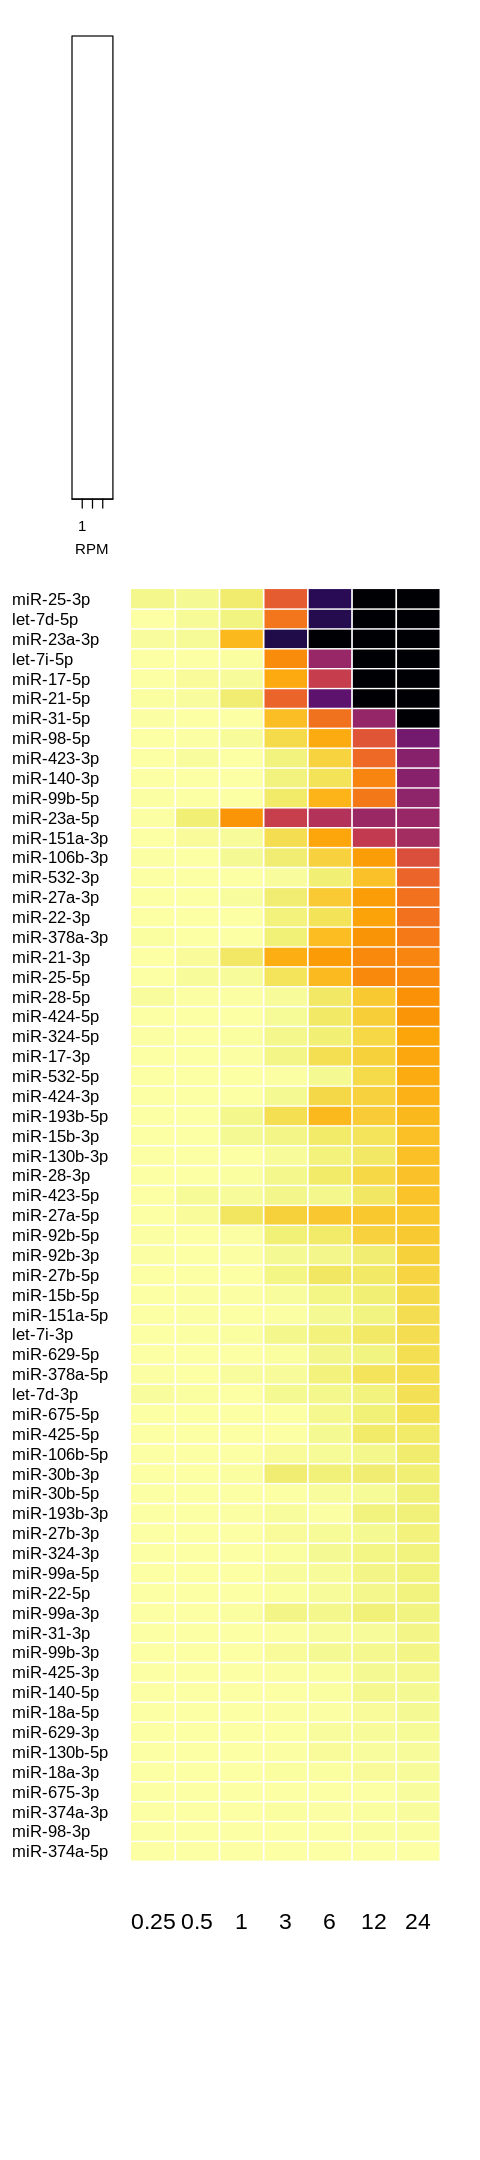

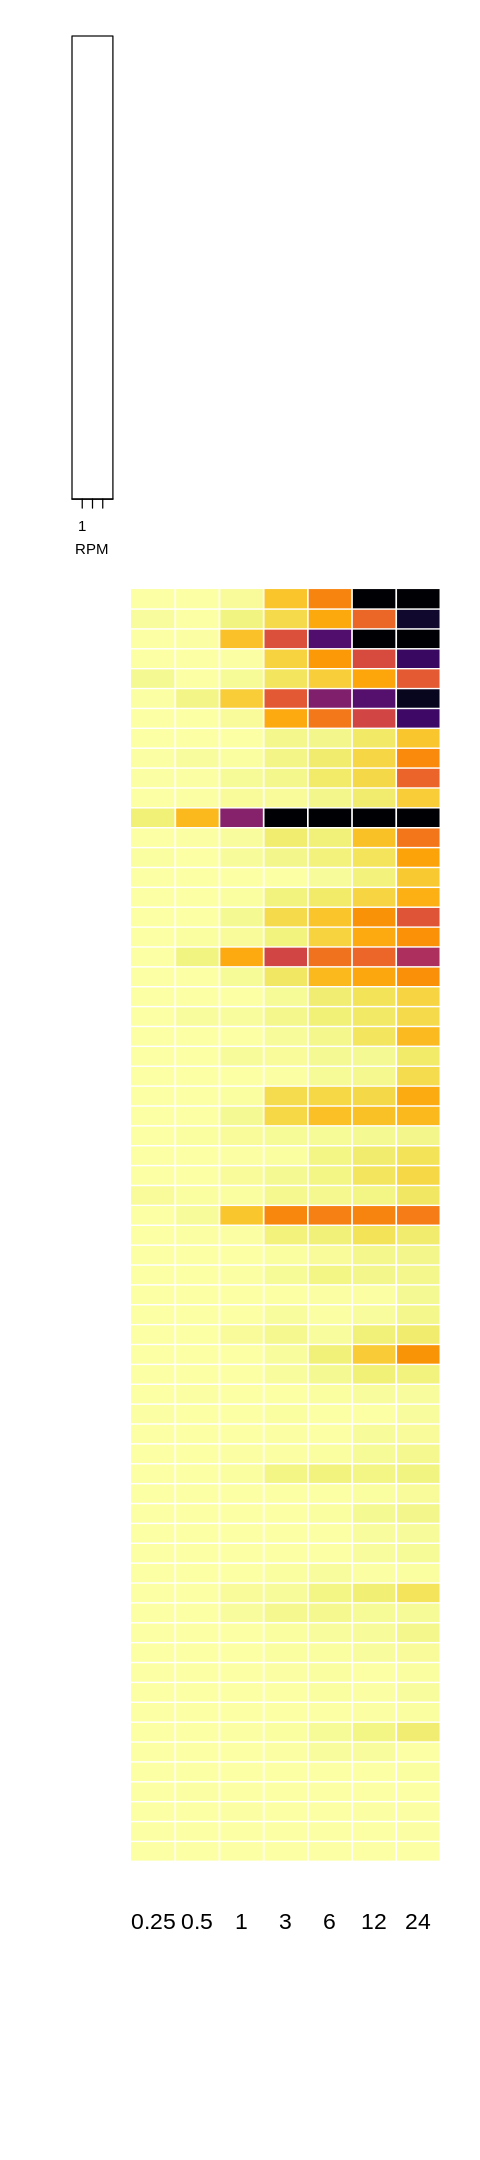

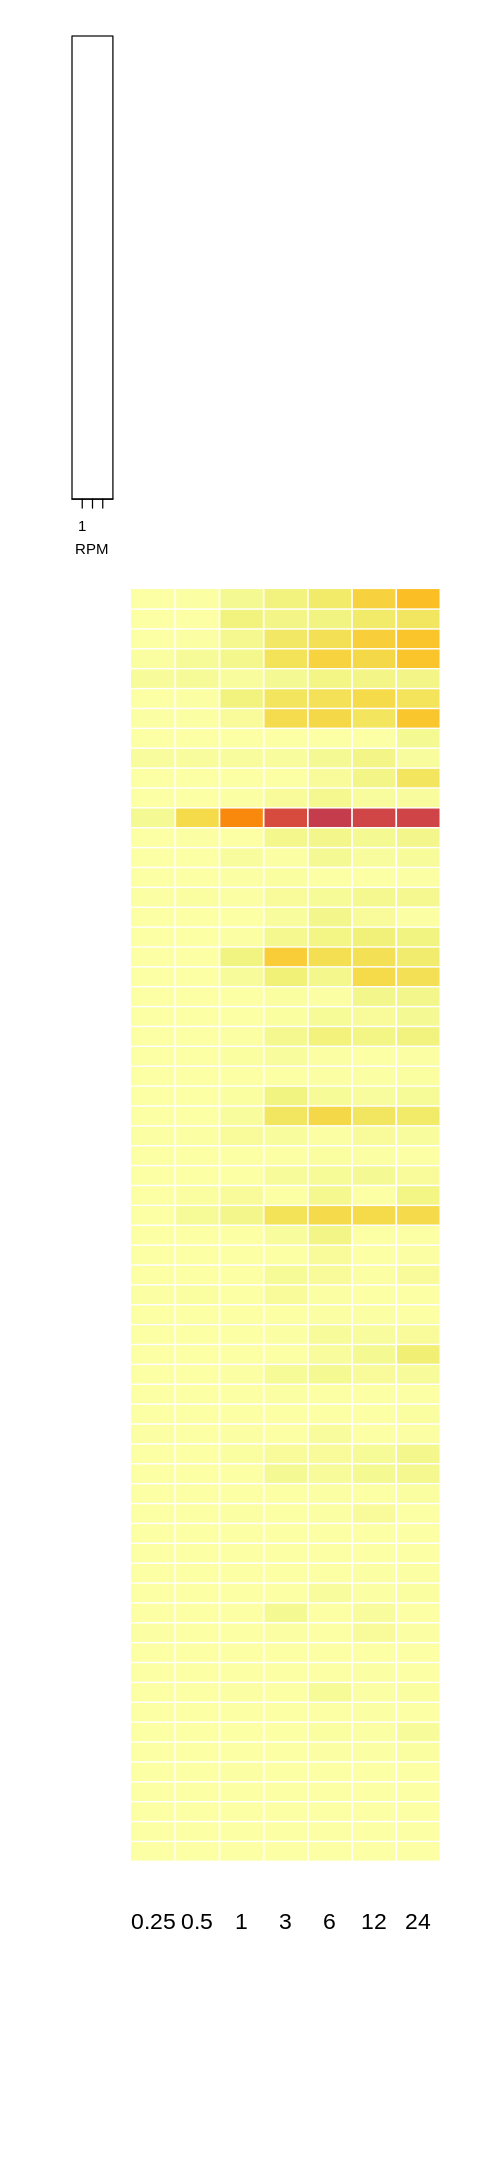

In [46]:
options(repr.plot.width=4, repr.plot.height=18)

#pdf(file = "figures_final/heatmap_timecourse_shControl_TCreads_64miRNAcouples.pdf", width = 4, height = 18)
heatmap.2(time.gfp.tc.64, Colv=FALSE, offsetRow=-22, 
         margins = c(15,2), cexRow=1,srtCol=0, adjCol = c(0.5,0),
         density.info = "none", trace = "none",
         Rowv = FALSE, dendrogram = "none",
         key.xlab="RPM", key.title="",
         colsep=1:nrow(time.gfp.tc), rowsep=1:nrow(time.gfp.tc), sepcolor = "white", sepwidth=c(0.01,0.01), symbreaks=FALSE,
         #col = c("white", viridis::inferno(length(breaks)-2, direction=-1)), breaks = breaks)#c(0:180))
         col = c(viridis::inferno(length(breaks)-1, direction=-1)), breaks = breaks)
#dev.off()

#pdf(file = "figures_final/heatmap_timecourse_shINTS6_TCreads_64miRNAcouples.pdf", width = 4, height = 18)
heatmap.2(time.6.tc.64, Colv=FALSE, offsetRow=-35, labRow = FALSE,
         margins = c(15,2), cexRow=1,srtCol=0, adjCol = c(0.5,0),
         density.info = "none", trace = "none",
         Rowv = FALSE, dendrogram = "none",
         key.xlab="RPM", key.title="",
         colsep=1:nrow(time.6.tc), rowsep=1:nrow(time.6.tc), sepcolor = "white", sepwidth=c(0.01,0.01), symbreaks=FALSE,
         #col = c("white", viridis::inferno(length(breaks)-2, direction=-1)), breaks = breaks)#c(0:180))
         col = c(viridis::inferno(length(breaks)-1, direction=-1)), breaks = breaks)
#dev.off()

#pdf(file = "figures_final/heatmap_timecourse_shINTS11_TCreads_64miRNAcouples.pdf", width = 4, height = 18)
heatmap.2(time.11.tc.64, Colv=FALSE, offsetRow=-35, labRow = FALSE,
         margins = c(15,2), cexRow=1,srtCol=0, adjCol = c(0.5,0),
         density.info = "none", trace = "none",
         Rowv = FALSE, dendrogram = "none",
         key.xlab="RPM", key.title="",
         colsep=1:nrow(time.6.tc), rowsep=1:nrow(time.6.tc), sepcolor = "white", sepwidth=c(0.01,0.01), symbreaks=FALSE,
         #col = c("white", viridis::inferno(length(breaks)-2, direction=-1)), breaks = breaks)#c(0:180))
         col = c(viridis::inferno(length(breaks)-1, direction=-1)), breaks = breaks)
#dev.off()


# Timecourse plot total

In [ ]:
# Figure 3b

In [47]:
head(gfp.total)

fin.total <- rbind.data.frame(gfp.total, ints6.total, ints11.total)

,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,1068.3516,shControl
2,let-7d-5p,0.25,459.8052,shControl
3,miR-191-5p,0.25,448.1925,shControl
4,miR-93-5p,0.25,396.4001,shControl
5,miR-17-5p,0.25,388.5429,shControl
6,miR-224-5p,0.25,391.2045,shControl


In [49]:
# Careful! By using this function, my standard dplyr does not work correctly anymore! Don't do table calcs after this!!

In [50]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
##   http://www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_(ggplot2)/#Helper functions
##   
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
        library(plyr)
        
        # New version of length which can handle NA's: if na.rm==T, don't count them
        length2 <- function (x, na.rm=FALSE) {
                if (na.rm) sum(!is.na(x))
                else       length(x)
        }
        
        # This does the summary. For each group's data frame, return a vector with
        # N, mean, and sd
        datac <- ddply(data, groupvars, .drop=.drop,
                       .fun = function(xx, col) {
                               c(N    = length2(xx[[col]], na.rm=na.rm),
                                 mean = mean   (xx[[col]], na.rm=na.rm),
                                 sd   = sd     (xx[[col]], na.rm=na.rm)
                               )
                       },
                       measurevar
        )
        
        # Rename the "mean" column    
        datac <- rename(datac, c("mean" = measurevar))
        
        datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean
        
        # Confidence interval multiplier for standard error
        # Calculate t-statistic for confidence interval: 
        # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
        ciMult <- qt(conf.interval/2 + .5, datac$N-1)
        datac$ci <- datac$se * ciMult
        
        return(datac)
}



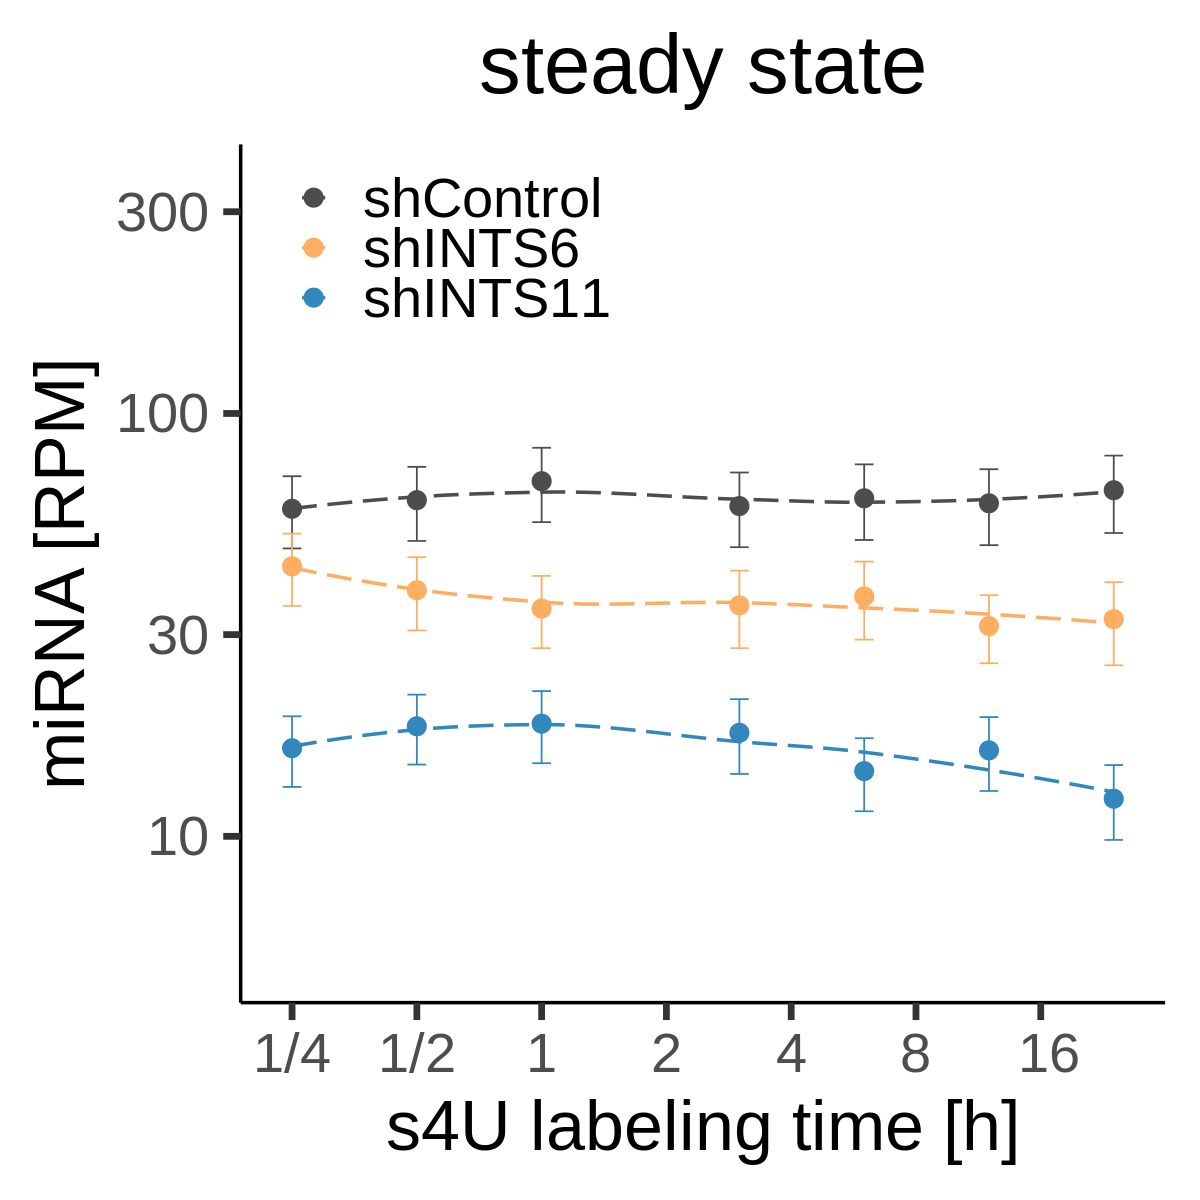

In [53]:
test <- summarySE(fin.total, measurevar="ppm", groupvars=c("time","hela"))


options(repr.plot.width=10, repr.plot.height=10)



ylog <- ggplot(data = test, aes(x = time, y=ppm, col=hela)) +
        theme_bw(base_size = 42) +
        ggtitle("steady state") +
        theme(plot.title = element_text(hjust = '0.5', size=50)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.233, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10',limits=c(5,350))+ #labels = function(x) format(x, scientific = TRUE))+#,breaks =round(c(1/32, 1/16, 1/8, 1/4,1/2, 1, 2, 4), digits=2))+
        xlab("s4U labeling time [h]")+
        ylab("miRNA [RPM]")+
        scale_colour_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        #annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        #geom_line(size=1, lty=1)+
        geom_point(lwd=5) +
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se)) +
        geom_smooth(method="loess", formula= 'y ~(x)', se=FALSE, span=1, size=1, linetype="longdash", aes(color=hela))

ylog

# Timecourse plot TC

In [ ]:
# Figure 3f

In [62]:
time.gfp.tc <- time.gfp.tc[,-1] # remove timepoint 0
head(time.gfp.tc)
nrow(time.gfp.tc)

time.6.tc <- time.6.tc[,-1]
head(time.6.tc)
nrow(time.6.tc)

time.11.tc <- time.11.tc[,-1]
head(time.11.tc)
nrow(time.11.tc)

,0.25,0.5,1,3,6,12,24
miR-25-3p,0.105787915,0.07345855,0.230208162,1.4803791,3.406950,8.101106,16.378497
let-7d-5p,0.000000000,0.06343105,0.146672809,1.2129480,3.458830,8.390012,16.152458
miR-191-5p,0.000000000,0.00000000,0.122735381,1.0632389,1.652820,3.408551,4.459635
miR-93-5p,0.000000000,0.02671003,0.007642077,0.8150988,2.395398,5.140862,9.403356
miR-17-5p,0.002671809,0.04129615,0.056451076,0.7517984,1.879273,4.310463,6.997639
miR-224-5p,0.004243910,0.02466561,0.000000000,0.4753326,2.718309,8.955648,15.040039


[1] 126

,0.25,0.5,1,3,6,12,24
miR-25-3p,0.00000000,0.000000000,0.04425458,0.5477040,1.0760035,4.0921128,5.691112
let-7d-5p,0.03946259,0.005935351,0.14959645,0.3680428,0.7634666,1.3550181,3.677285
miR-191-5p,0.27173106,0.219693782,0.48033984,0.4980385,0.7800855,1.2372896,1.655835
miR-93-5p,0.00000000,0.000000000,0.06621305,0.2872933,0.5334217,1.2965662,2.843867
miR-17-5p,0.08907931,0.000000000,0.06497821,0.2816201,0.4565978,0.7819278,1.499300
miR-224-5p,0.00000000,0.001558764,0.01396478,0.2585163,0.7428713,1.4014763,2.802743


[1] 126

,0.25,0.5,1,3,6,12,24
miR-25-3p,0.008324505,0.01355459,0.08145988,0.15978211,0.23359415,0.43393240,0.6002409
let-7d-5p,0.000000000,0.00000000,0.15984783,0.13065085,0.14646071,0.23492215,0.2727507
miR-191-5p,0.000000000,0.07467963,0.00000000,0.10455905,0.02951083,0.06276935,0.2027554
miR-93-5p,0.010184022,0.13465787,0.15770955,0.17350149,0.24091891,0.30315254,0.3394579
miR-17-5p,0.055617451,0.06203171,0.03224569,0.07587981,0.13344968,0.12516566,0.1210710
miR-224-5p,0.009926943,0.00000000,0.00000000,0.02843561,0.10855834,0.18913594,0.1580192


[1] 126

In [63]:
##library(data.table)
head(time.gfp.tc)
nrow(time.gfp.tc)


gfp <- reshape2::melt(time.gfp.tc)
gfp$hela <- "shControl"
colnames(gfp) <- c("arm.name", "time", "ppm", "hela")
gfp$arm.name <- as.character(gfp$arm.name)



ints6 <- reshape2::melt(time.6.tc)
ints6$hela <- "shINTS6"
colnames(ints6) <- c("arm.name", "time", "ppm", "hela")
ints6$arm.name <- as.character(ints6$arm.name)




ints11 <- reshape2::melt(time.11.tc)
ints11$hela <- "shINTS11"
colnames(ints11) <- c("arm.name", "time", "ppm", "hela")
ints11$arm.name <- as.character(ints11$arm.name)




fin <- rbind.data.frame(gfp, ints6, ints11)

,0.25,0.5,1,3,6,12,24
miR-25-3p,0.105787915,0.07345855,0.230208162,1.4803791,3.406950,8.101106,16.378497
let-7d-5p,0.000000000,0.06343105,0.146672809,1.2129480,3.458830,8.390012,16.152458
miR-191-5p,0.000000000,0.00000000,0.122735381,1.0632389,1.652820,3.408551,4.459635
miR-93-5p,0.000000000,0.02671003,0.007642077,0.8150988,2.395398,5.140862,9.403356
miR-17-5p,0.002671809,0.04129615,0.056451076,0.7517984,1.879273,4.310463,6.997639
miR-224-5p,0.004243910,0.02466561,0.000000000,0.4753326,2.718309,8.955648,15.040039


[1] 126

,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.105787915,shControl
2,let-7d-5p,0.25,0.000000000,shControl
3,miR-191-5p,0.25,0.000000000,shControl
4,miR-93-5p,0.25,0.000000000,shControl
5,miR-17-5p,0.25,0.002671809,shControl
6,miR-224-5p,0.25,0.004243910,shControl


,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
877,miR-1275-5p,24,0.25185398,shControl
878,miR-193a-5p,24,0.19670281,shControl
879,miR-582-5p,24,0.11599342,shControl
880,miR-27a-5p,24,0.52755953,shControl
881,miR-19b-3p,24,0.03712999,shControl
882,miR-629-3p,24,0.06247768,shControl


[1] 882

,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.00000000,shINTS6
2,let-7d-5p,0.25,0.03946259,shINTS6
3,miR-191-5p,0.25,0.27173106,shINTS6
4,miR-93-5p,0.25,0.00000000,shINTS6
5,miR-17-5p,0.25,0.08907931,shINTS6
6,miR-224-5p,0.25,0.00000000,shINTS6


,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
877,miR-1275-5p,24,0.62952901,shINTS6
878,miR-193a-5p,24,0.07916472,shINTS6
879,miR-582-5p,24,0.05744302,shINTS6
880,miR-27a-5p,24,1.15341973,shINTS6
881,miR-19b-3p,24,0.00500562,shINTS6
882,miR-629-3p,24,0.20113444,shINTS6


[1] 882

,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.008324505,shINTS11
2,let-7d-5p,0.25,0.000000000,shINTS11
3,miR-191-5p,0.25,0.000000000,shINTS11
4,miR-93-5p,0.25,0.010184022,shINTS11
5,miR-17-5p,0.25,0.055617451,shINTS11
6,miR-224-5p,0.25,0.009926943,shINTS11


,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
877,miR-1275-5p,24,0.271110678,shINTS11
878,miR-193a-5p,24,0.029101963,shINTS11
879,miR-582-5p,24,0.005339306,shINTS11
880,miR-27a-5p,24,0.364760811,shINTS11
881,miR-19b-3p,24,0.000000000,shINTS11
882,miR-629-3p,24,0.060908299,shINTS11


[1] 882

Warning message:
“Transformation introduced infinite values in continuous y-axis”


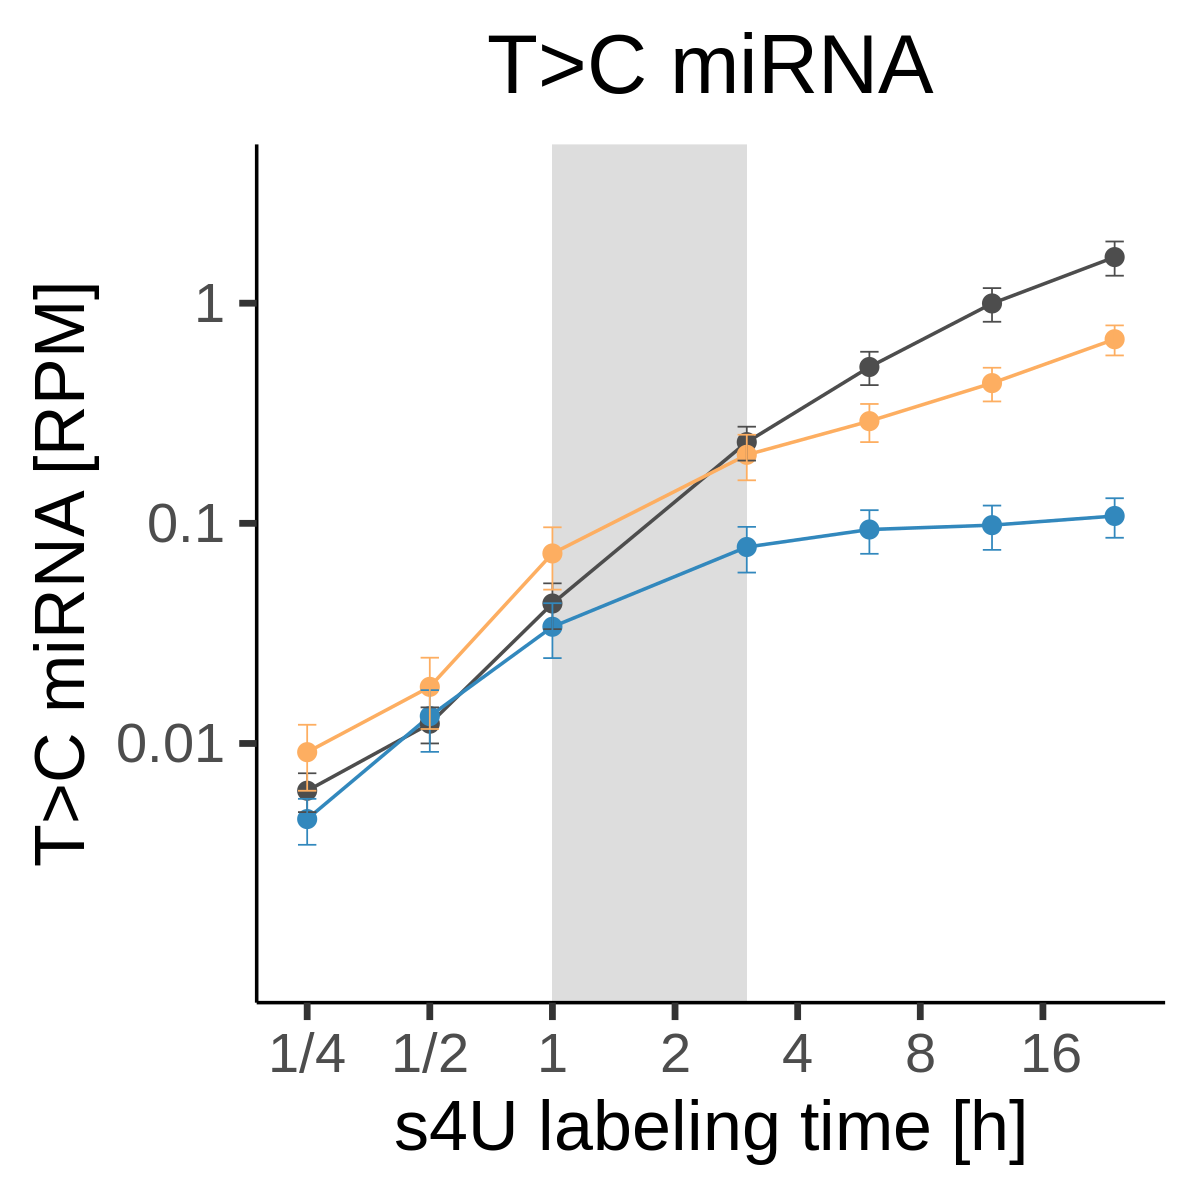

In [65]:
test <- summarySE(fin, measurevar="ppm", groupvars=c("time","hela"))


options(repr.plot.width=10, repr.plot.height=10)



ylog <- ggplot(data = test, aes(x = time, y=ppm, col=hela)) +
        theme_bw(base_size = 42) +
        ggtitle("T>C miRNA") +
        theme(plot.title = element_text(hjust = '0.5', size=50))+
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position="none", #c(0.27, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10',limits=c(0.001,3.5), breaks= c(0.01, 0.1, 1), labels = c(0.01, 0.1, 1))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        scale_colour_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"= col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(size=1, lty=1)+
        geom_point(lwd=5) +
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se)) 

ylog

In [66]:
print("15min")
#res.aov <- aov(ppm~hela,  data=fin[fin$time=="0.25",]) 
#summary(res.aov)
#TukeyHSD(res.aov)
print("30min")
#res.aov <- aov(ppm~hela,  data=fin[fin$time=="0.5",]) 
#summary(res.aov)
#TukeyHSD(res.aov)
print("1h")
#res.aov <- aov(ppm~hela,  data=fin[fin$time=="1",]) 
#summary(res.aov)
#TukeyHSD(res.aov)
print("3h")
res.aov <- aov(ppm~hela,  data=fin[fin$time=="3",]) 
summary(res.aov)
TukeyHSD(res.aov)
print("6h")
res.aov <- aov(ppm~hela,  data=fin[fin$time=="6",]) 
summary(res.aov)
TukeyHSD(res.aov)
print("12h")
res.aov <- aov(ppm~hela,  data=fin[fin$time=="12",]) 
summary(res.aov)
TukeyHSD(res.aov)
print("24h")
res.aov <- aov(ppm~hela,  data=fin[fin$time=="24",]) 
summary(res.aov)
TukeyHSD(res.aov)

[1] "15min"
[1] "30min"
[1] "1h"
[1] "3h"


             Df Sum Sq Mean Sq F value  Pr(>F)   
hela          2   1.73  0.8639   4.774 0.00897 **
Residuals   375  67.85  0.1809                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ppm ~ hela, data = fin[fin$time == "3", ])

$hela
                          diff           lwr         upr     p adj
shINTS11-shControl -0.15572314 -0.2818293900 -0.02961690 0.0108127
shINTS6-shControl  -0.02906688 -0.1551731273  0.09703937 0.8504328
shINTS6-shINTS11    0.12665626  0.0005500158  0.25276251 0.0487304


[1] "6h"


             Df Sum Sq Mean Sq F value   Pr(>F)    
hela          2  11.09   5.546   11.43 1.52e-05 ***
Residuals   375 181.95   0.485                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ppm ~ hela, data = fin[fin$time == "6", ])

$hela
                         diff          lwr         upr     p adj
shINTS11-shControl -0.4193525 -0.625850958 -0.21285401 0.0000076
shINTS6-shControl  -0.2219219 -0.428420397 -0.01542344 0.0317287
shINTS6-shINTS11    0.1974306 -0.009067916  0.40392904 0.0644023


[1] "12h"


             Df Sum Sq Mean Sq F value   Pr(>F)    
hela          2     52  26.011   16.99 8.62e-08 ***
Residuals   375    574   1.531                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ppm ~ hela, data = fin[fin$time == "12", ])

$hela
                         diff        lwr        upr     p adj
shINTS11-shControl -0.8990911 -1.2658687 -0.5323134 0.0000001
shINTS6-shControl  -0.5637052 -0.9304829 -0.1969275 0.0009880
shINTS6-shINTS11    0.3353859 -0.0313918  0.7021635 0.0810860


[1] "24h"


             Df Sum Sq Mean Sq F value   Pr(>F)    
hela          2  146.6   73.31   18.53 2.11e-08 ***
Residuals   375 1483.3    3.96                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = ppm ~ hela, data = fin[fin$time == "24", ])

$hela
                         diff         lwr        upr     p adj
shINTS11-shControl -1.5116832 -2.10129213 -0.9220743 0.0000000
shINTS6-shControl  -0.9337725 -1.52338143 -0.3441636 0.0006545
shINTS6-shINTS11    0.5779107 -0.01169821  1.1675196 0.0561320


# separate guide vs passenger strand

In [ ]:
# only look at the 64 mature and star mirs:
# provided in github Shiekhattarlab/miRNApaper/s4U_figures/32_miRNA_couples_toAnalyze.txt
mi <- unique(read.delim("32_miRNA_couples_toAnalyze.txt", header=F))
colnames(mi) <- c("arm.name", "star")
length(unique(mi$arm.name))

In [87]:
# plot shControl vs shINTS6 with only 64 miRNA

fin.selection <- fin[grepl(paste0(mi$sarm.name, collapse = "|"),fin$arm.name),]
head(fin.selection)

[1] 448

,arm.name,time,ppm,hela
,<chr>,<dbl>,<dbl>,<chr>
1,miR-25-3p,0.25,0.105787915,shControl
2,let-7d-5p,0.25,0.000000000,shControl
3,miR-191-5p,0.25,0.000000000,shControl
4,miR-93-5p,0.25,0.000000000,shControl
5,miR-17-5p,0.25,0.002671809,shControl
6,miR-224-5p,0.25,0.004243910,shControl


Warning message:
“Transformation introduced infinite values in continuous y-axis”


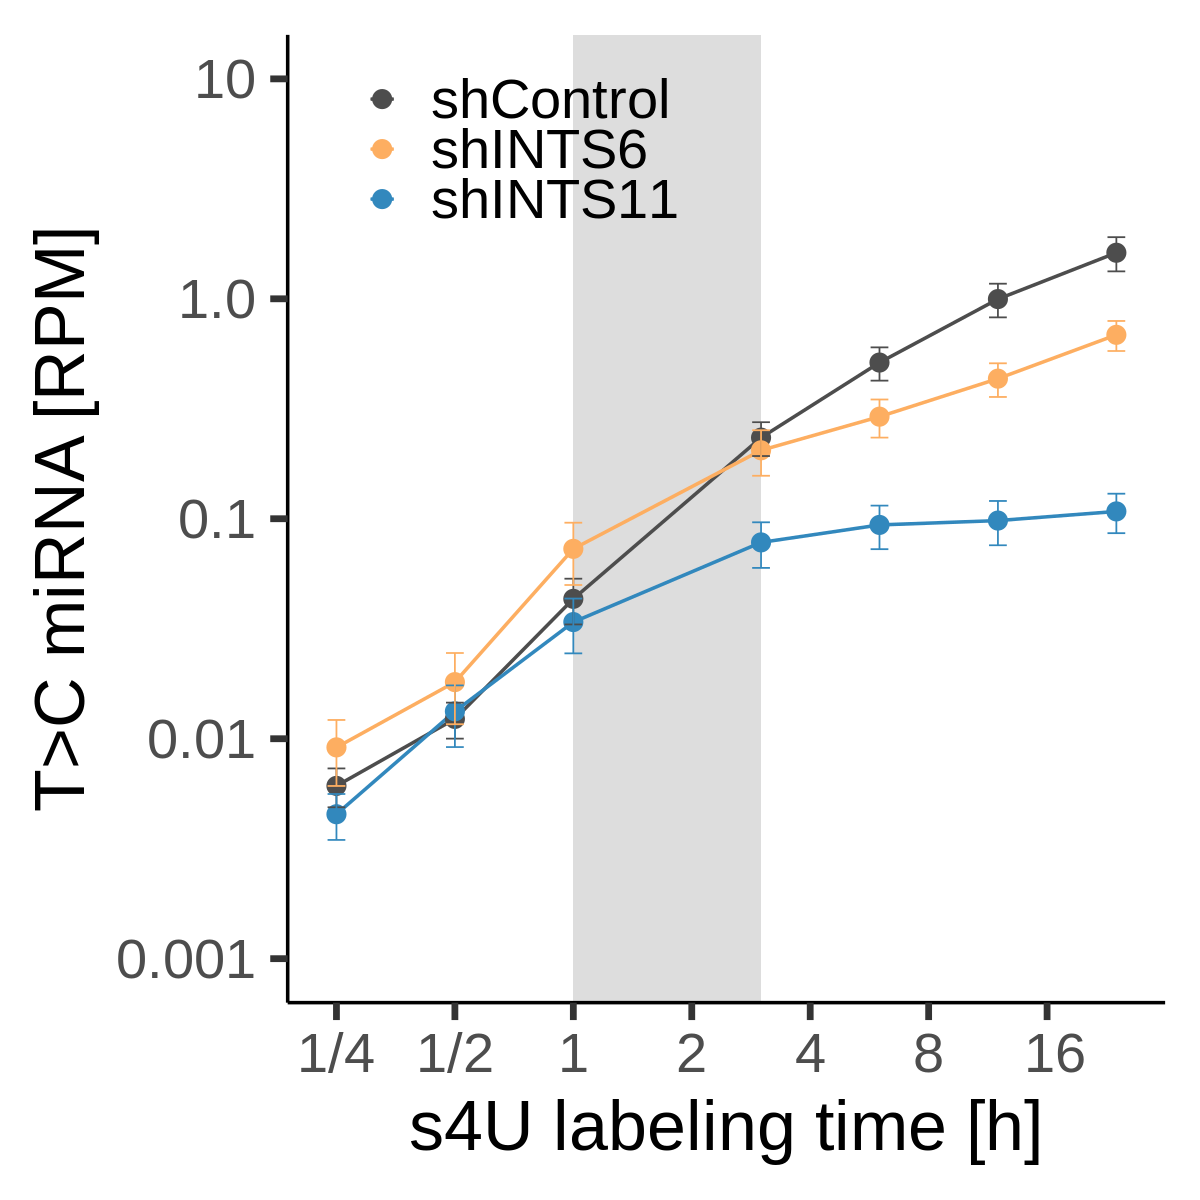

In [89]:
test.selection <- summarySE(fin.selection, measurevar="ppm", groupvars=c("time","hela"))


options(repr.plot.width=10, repr.plot.height=10)

ylog <- ggplot(data = test.selection, aes(x = time, y=ppm, col=hela)) +
        theme_bw(base_size = 42) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.27, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10', limits=c(0.001,10), breaks=c(0.001, 0.01, 0.1, 1, 10), labels=c("0.001","0.01","0.1", "1.0", "10"))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        scale_colour_manual(values = c("shControl"= col_shgfp, "shINTS6"= col_sh6, "shINTS11"=col_sh11), limits=c("shControl", "shINTS6", "shINTS11"))+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(size=1, lty=1)+
        geom_point(lwd=5) +
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se)) 

ylog

In [ ]:
# Figure 3c

In [92]:


gfp.star.selection <- gfp.star[grepl(paste0(mi$arm.name, collapse = "|"),gfp.star$arm.name),]

gfp.star.selection <- gfp.star.selection[complete.cases(gfp.star.selection$star),]


[1] 2

Warning message:
“Transformation introduced infinite values in continuous y-axis”


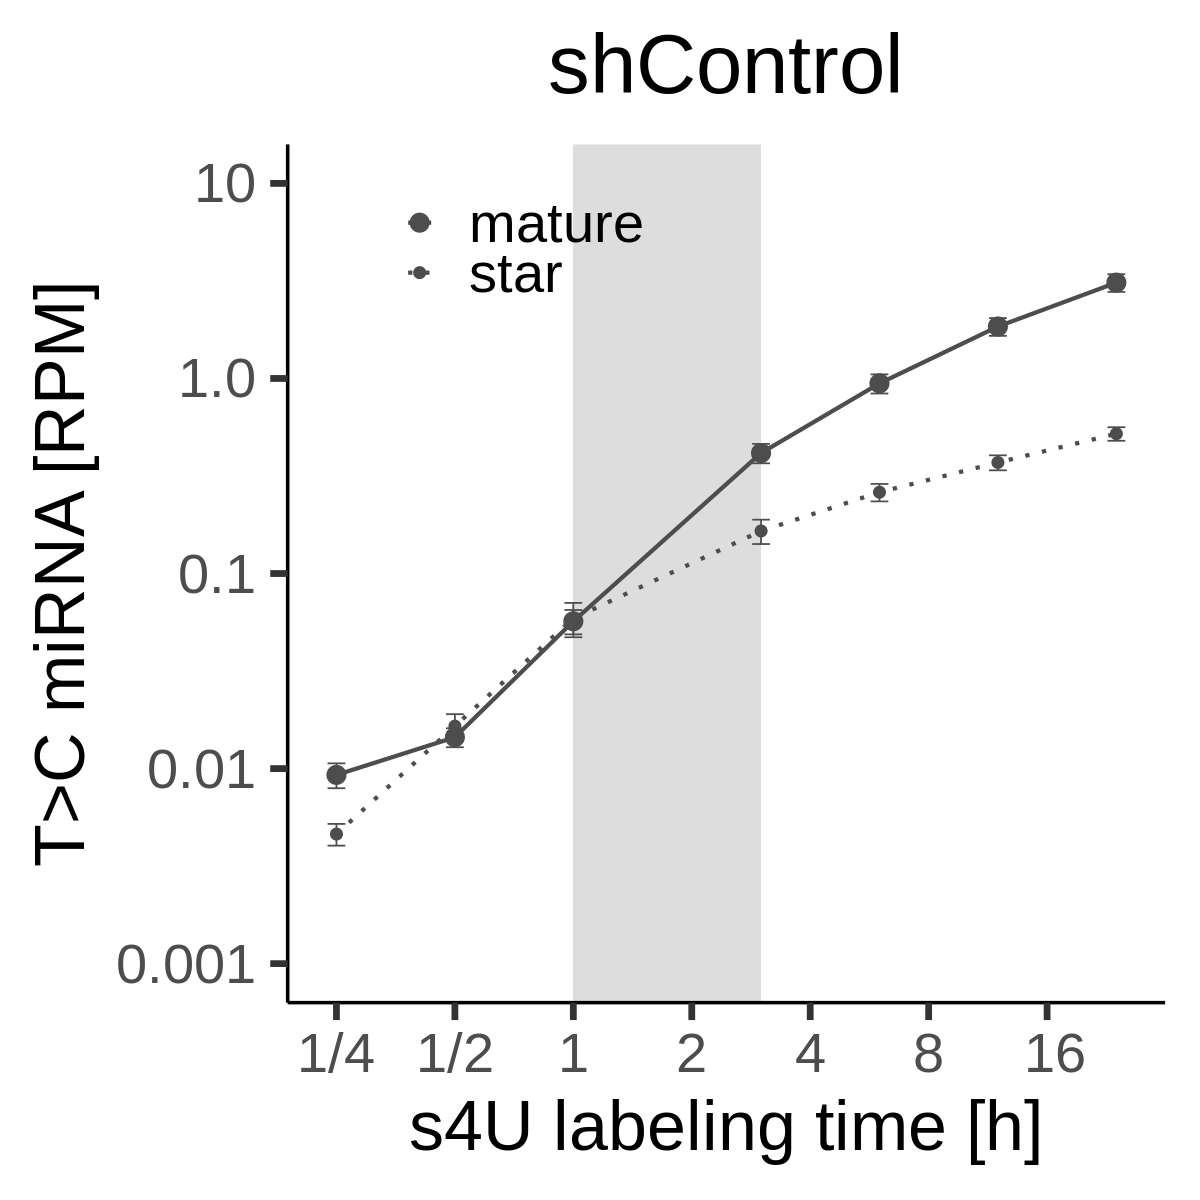

In [93]:
test.gfp <- summarySE(gfp.star.selection, measurevar="ppm", groupvars=c("time","star"))


options(repr.plot.width=10, repr.plot.height=10)

ylog <- ggplot(data = test.gfp, aes(x = time, y=ppm)) +
        theme_bw(base_size = 42) +
        ggtitle("shControl") +
        theme(plot.title = element_text(hjust = '0.5', size=50)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.27, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10', limits=c(0.001,10), breaks=c(0.001, 0.01, 0.1, 1, 10), labels=c("0.001","0.01","0.1", "1.0", "10"))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(aes(linetype=star), size=1.2, color=col_shgfp)+
        scale_linetype_manual(values=c("solid", "dotted"))+
        geom_point(aes(size=star), color=col_shgfp) +
        scale_size_manual(values=c(5,3))+
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se), color=col_shgfp)
        #geom_smooth(method=NULL, formula= 'y ~(x)', se=FALSE, span=1, size=1, linetype="longdash", aes(color=star))

ylog

In [40]:
mean(gfp.star.selection[gfp.star.selection$time=="3" & gfp.star.selection$star=="guide",3])
mean(gfp.star.selection[gfp.star.selection$time=="3" & gfp.star.selection$star=="passenger",3])

[1] 0.4556592

[1] 0.2045703

In [57]:
print("15min")
#wilcox.test(ppm~star, data=gfp.star.selection[gfp.star.selection$time=="0.25",]) 
print("30min")
#wilcox.test(ppm~star, data=gfp.star.selection[gfp.star.selection$time=="0.5",]) 
print("1h")
#wilcox.test(ppm~star, data=gfp.star.selection[gfp.star.selection$time=="1",]) 
print("3h")
wilcox.test(ppm~star, data=gfp.star.selection[gfp.star.selection$time=="3",]) 
print("6h")
wilcox.test(ppm~star, data=gfp.star.selection[gfp.star.selection$time=="6",]) 
print("12h")
wilcox.test(ppm~star, data=gfp.star.selection[gfp.star.selection$time=="12",]) 
print("24h")
wilcox.test(ppm~star, data=gfp.star.selection[gfp.star.selection$time=="24",]) 


[1] "15min"
[1] "30min"
[1] "1h"
[1] "3h"


Warning message in wilcox.test.default(x = c(1.2129480266746, 1.01017377080767, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  ppm by star
W = 436, p-value = 0.03167
alternative hypothesis: true location shift is not equal to 0


[1] "6h"



	Wilcoxon rank sum test

data:  ppm by star
W = 436, p-value = 0.03081
alternative hypothesis: true location shift is not equal to 0


[1] "12h"



	Wilcoxon rank sum test

data:  ppm by star
W = 467, p-value = 0.005509
alternative hypothesis: true location shift is not equal to 0


[1] "24h"



	Wilcoxon rank sum test

data:  ppm by star
W = 483, p-value = 0.001922
alternative hypothesis: true location shift is not equal to 0


## shINTS6: active vs. star

In [ ]:
# Figure 3d

In [105]:
# miR active vs. star

ints6.star <- merge(ints6, mi, by="arm.name")
ints6.star <- ints6.star[order(ints6.star$time),]
head(ints6.star)

ints6.star.selection <- ints6.star[grepl(paste0(mi$arm.name, collapse = "|"),ints6.star$arm.name),]

ints6.star.selection <- ints6.star[complete.cases(ints6.star.selection$star),]



,arm.name,time,ppm,hela,star
,<chr>,<dbl>,<dbl>,<chr>,<chr>
43,let-7d-3p,0.25,0,shINTS6,star
44,let-7d-3p,0.25,0,shINTS6,star
45,let-7d-3p,0.25,0,shINTS6,star
46,let-7d-3p,0.25,0,shINTS6,star
47,let-7d-3p,0.25,0,shINTS6,star
48,let-7d-3p,0.25,0,shINTS6,star


Warning message:
“Transformation introduced infinite values in continuous y-axis”


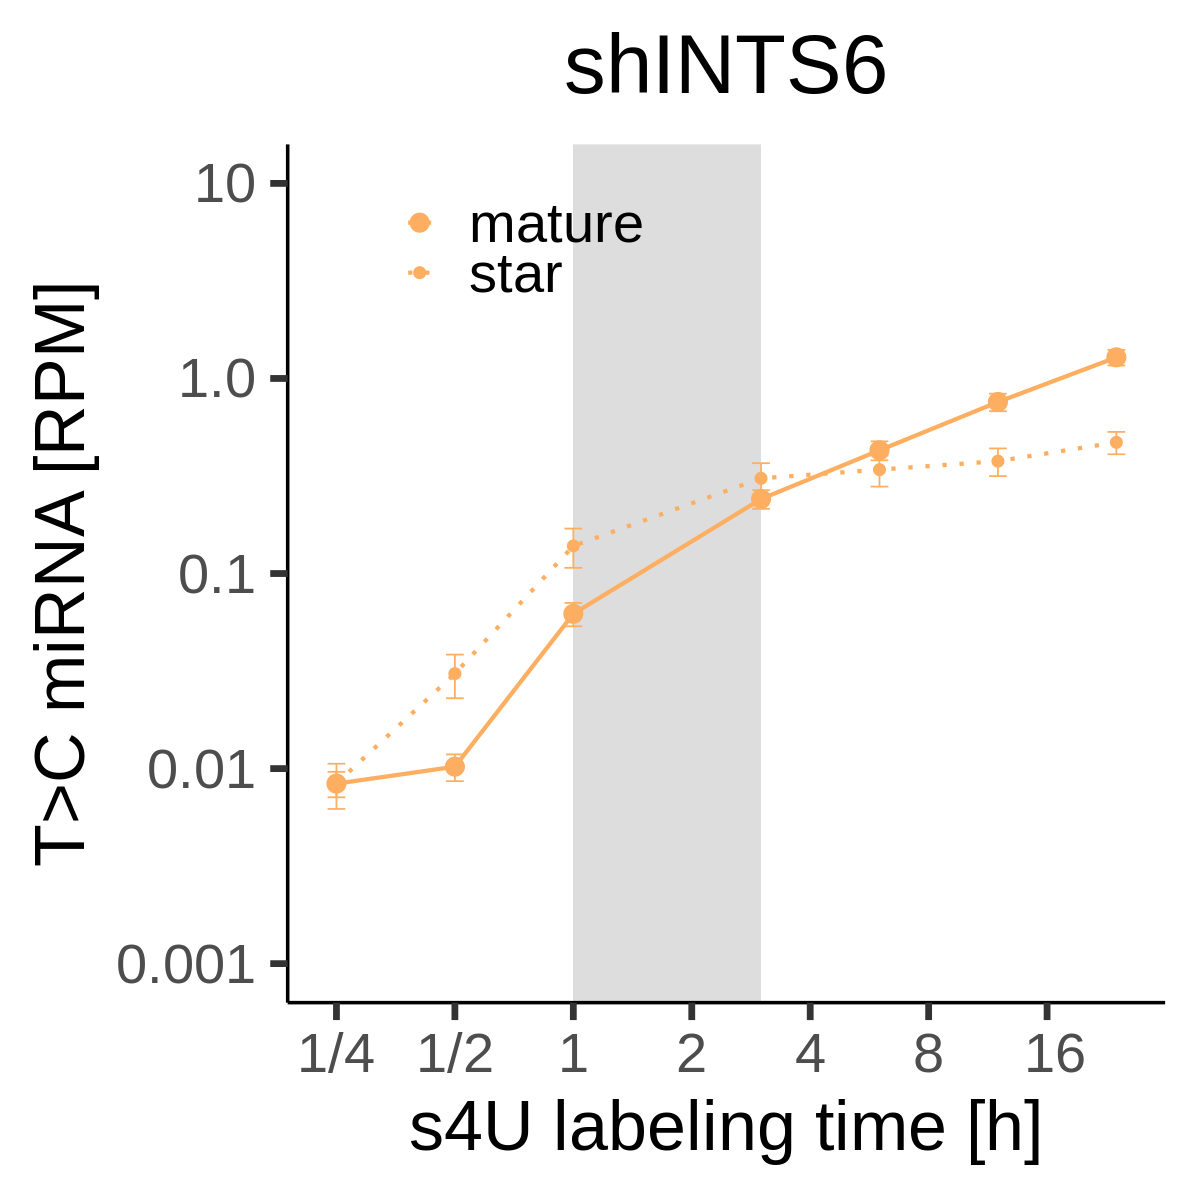

In [106]:
test.ints6 <- summarySE(ints6.star.selection, measurevar="ppm", groupvars=c("time","star"))


options(repr.plot.width=10, repr.plot.height=10)



ylog <- ggplot(data = test.ints6, aes(x = time, y=ppm)) +
        theme_bw(base_size = 42) +
        ggtitle("shINTS6") +
        theme(plot.title = element_text(hjust = '0.5', size=50)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.27, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10', limits=c(0.001,10), breaks=c(0.001, 0.01, 0.1, 1, 10), labels=c("0.001","0.01","0.1", "1.0", "10"))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(aes(linetype=star), size=1.2, color=col_sh6)+
        scale_linetype_manual(values=c("solid", "dotted"))+
        geom_point(aes(size=star), color=col_sh6) +
        scale_size_manual(values=c(5,3))+
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se), color=col_sh6)
        #geom_ribbon(aes(ymin=ppm-se, ymax=ppm+se), fill=c(rep(rgb(30,144,255, alpha=25, max=255), times=8), rep(rgb(16,78,139, alpha=25, max=255), times=8)), linetype=0)

ylog

In [107]:
print("15min")
#wilcox.test(ppm~star, data=ints6.star.selection[ints6.star.selection$time=="0.25",]) 
print("30min")
#wilcox.test(ppm~star, data=ints6.star.selection[ints6.star.selection$time=="0.5",])
print("1h")
#wilcox.test(ppm~star, data=ints6.star.selection[ints6.star.selection$time=="1",]) 
print("3h")
wilcox.test(ppm~star, data=ints6.star.selection[ints6.star.selection$time=="3",]) 
print("6h")
wilcox.test(ppm~star, data=ints6.star.selection[ints6.star.selection$time=="6",]) 
print("12h")
wilcox.test(ppm~star, data=ints6.star.selection[ints6.star.selection$time=="12",]) 
print("24h")
wilcox.test(ppm~star, data=ints6.star.selection[ints6.star.selection$time=="24",]) 


[1] "15min"
[1] "30min"
[1] "1h"
[1] "3h"



	Wilcoxon rank sum test with continuity correction

data:  ppm by star
W = 29596, p-value = 3.611e-06
alternative hypothesis: true location shift is not equal to 0


[1] "6h"



	Wilcoxon rank sum test with continuity correction

data:  ppm by star
W = 30160, p-value = 4.118e-07
alternative hypothesis: true location shift is not equal to 0


[1] "12h"



	Wilcoxon rank sum test with continuity correction

data:  ppm by star
W = 31948, p-value = 1.256e-10
alternative hypothesis: true location shift is not equal to 0


[1] "24h"



	Wilcoxon rank sum test with continuity correction

data:  ppm by star
W = 33124, p-value = 2.256e-13
alternative hypothesis: true location shift is not equal to 0


## shINTS11: active vs. star

In [ ]:
# Figure 3e

In [110]:
# miR active vs. star

ints11.star <- merge(ints11, mi, by="arm.name")
ints11.star <- ints11.star[order(ints11.star$time),]
head(ints11.star)

ints11.star.selection <- ints11.star

ints11.star.selection <- ints11.star.selection[complete.cases(ints11.star.selection$star),]



,arm.name,time,ppm,hela,star
,<chr>,<dbl>,<dbl>,<chr>,<chr>
43,let-7d-3p,0.25,0,shINTS11,star
44,let-7d-3p,0.25,0,shINTS11,star
45,let-7d-3p,0.25,0,shINTS11,star
46,let-7d-3p,0.25,0,shINTS11,star
47,let-7d-3p,0.25,0,shINTS11,star
48,let-7d-3p,0.25,0,shINTS11,star


Warning message:
“Transformation introduced infinite values in continuous y-axis”


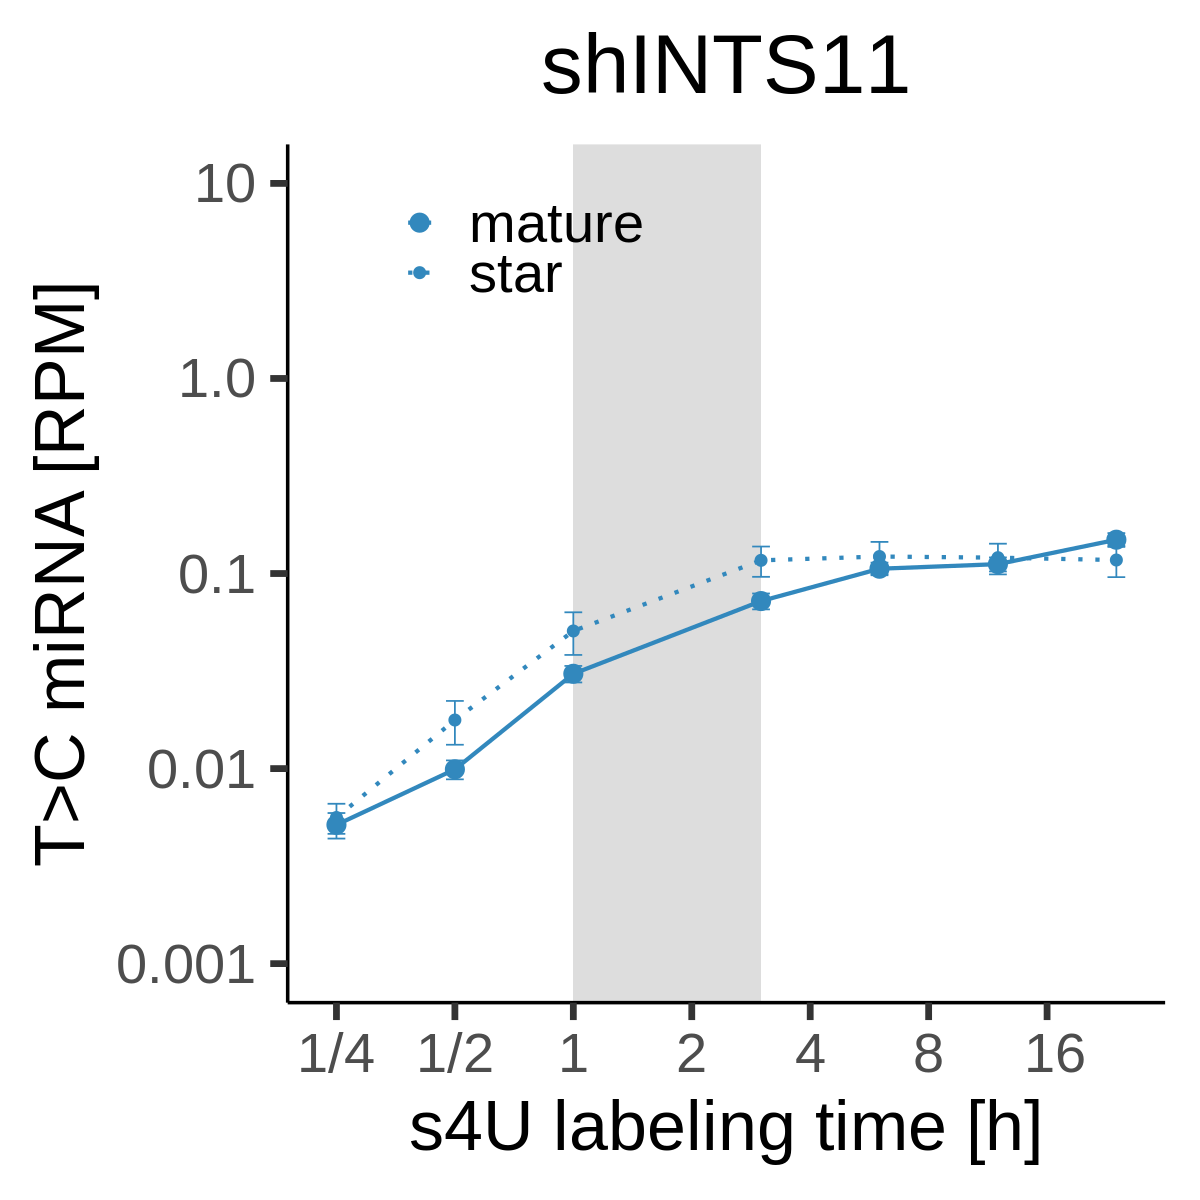

In [113]:
test.ints11 <- summarySE(ints11.star.selection, measurevar="ppm", groupvars=c("time","star"))


options(repr.plot.width=10, repr.plot.height=10)


ylog <- ggplot(data = test.ints11, aes(x = time, y=ppm)) +
        theme_bw(base_size = 42) +
        ggtitle("shINTS11") +
        theme(plot.title = element_text(hjust = '0.5', size=50)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.27, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10', limits=c(0.001,10), breaks=c(0.001, 0.01, 0.1, 1, 10), labels=c("0.001","0.01","0.1", "1.0", "10"))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(aes(linetype=star), size=1.2, color=col_sh11)+
        scale_linetype_manual(values=c("solid", "dotted"))+
        geom_point(aes(size=star), color=col_sh11) +
        scale_size_manual(values=c(5,3))+
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se), color=col_sh11)
        #geom_ribbon(aes(ymin=ppm-se, ymax=ppm+se), fill=c(rep(rgb(30,144,255, alpha=25, max=255), times=8), rep(rgb(16,78,139, alpha=25, max=255), times=8)), linetype=0)

ylog

In [114]:
print("15min")
t.test(ppm~star, data=ints11.star.selection[ints11.star.selection$time=="0.25",]) 
print("30min")
t.test(ppm~star, data=ints11.star.selection[ints11.star.selection$time=="0.5",])
print("1h")
t.test(ppm~star, data=ints11.star.selection[ints11.star.selection$time=="1",]) 
print("3h")
t.test(ppm~star, data=ints11.star.selection[ints11.star.selection$time=="3",]) 
print("6h")
t.test(ppm~star, data=ints11.star.selection[ints11.star.selection$time=="6",]) 
print("12h")
t.test(ppm~star, data=ints11.star.selection[ints11.star.selection$time=="12",]) 
print("24h")
t.test(ppm~star, data=ints11.star.selection[ints11.star.selection$time=="24",]) 


[1] "15min"



	Welch Two Sample t-test

data:  ppm by star
t = -0.37282, df = 407.89, p-value = 0.7095
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.002924207  0.001991865
sample estimates:
mean in group mature   mean in group star 
         0.005147300          0.005613471 


[1] "30min"



	Welch Two Sample t-test

data:  ppm by star
t = -1.694, df = 242, p-value = 0.09155
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.016929229  0.001274286
sample estimates:
mean in group mature   mean in group star 
         0.009911479          0.017738951 


[1] "1h"



	Welch Two Sample t-test

data:  ppm by star
t = -1.5661, df = 240.4, p-value = 0.1186
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.045468725  0.005192694
sample estimates:
mean in group mature   mean in group star 
          0.03061838           0.05075640 


[1] "3h"



	Welch Two Sample t-test

data:  ppm by star
t = -2.0495, df = 261.61, p-value = 0.04141
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.087434568 -0.001750601
sample estimates:
mean in group mature   mean in group star 
          0.07224357           0.11683616 


[1] "6h"



	Welch Two Sample t-test

data:  ppm by star
t = -0.67356, df = 265.68, p-value = 0.5012
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06430536  0.03152301
sample estimates:
mean in group mature   mean in group star 
           0.1058348            0.1222260 


[1] "12h"



	Welch Two Sample t-test

data:  ppm by star
t = -0.37809, df = 291.43, p-value = 0.7056
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05510791  0.03734698
sample estimates:
mean in group mature   mean in group star 
           0.1117102            0.1205906 


[1] "24h"



	Welch Two Sample t-test

data:  ppm by star
t = 1.2899, df = 340.92, p-value = 0.198
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01668467  0.08025702
sample estimates:
mean in group mature   mean in group star 
           0.1490683            0.1172821 


### plot final plot - all shRNAs

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


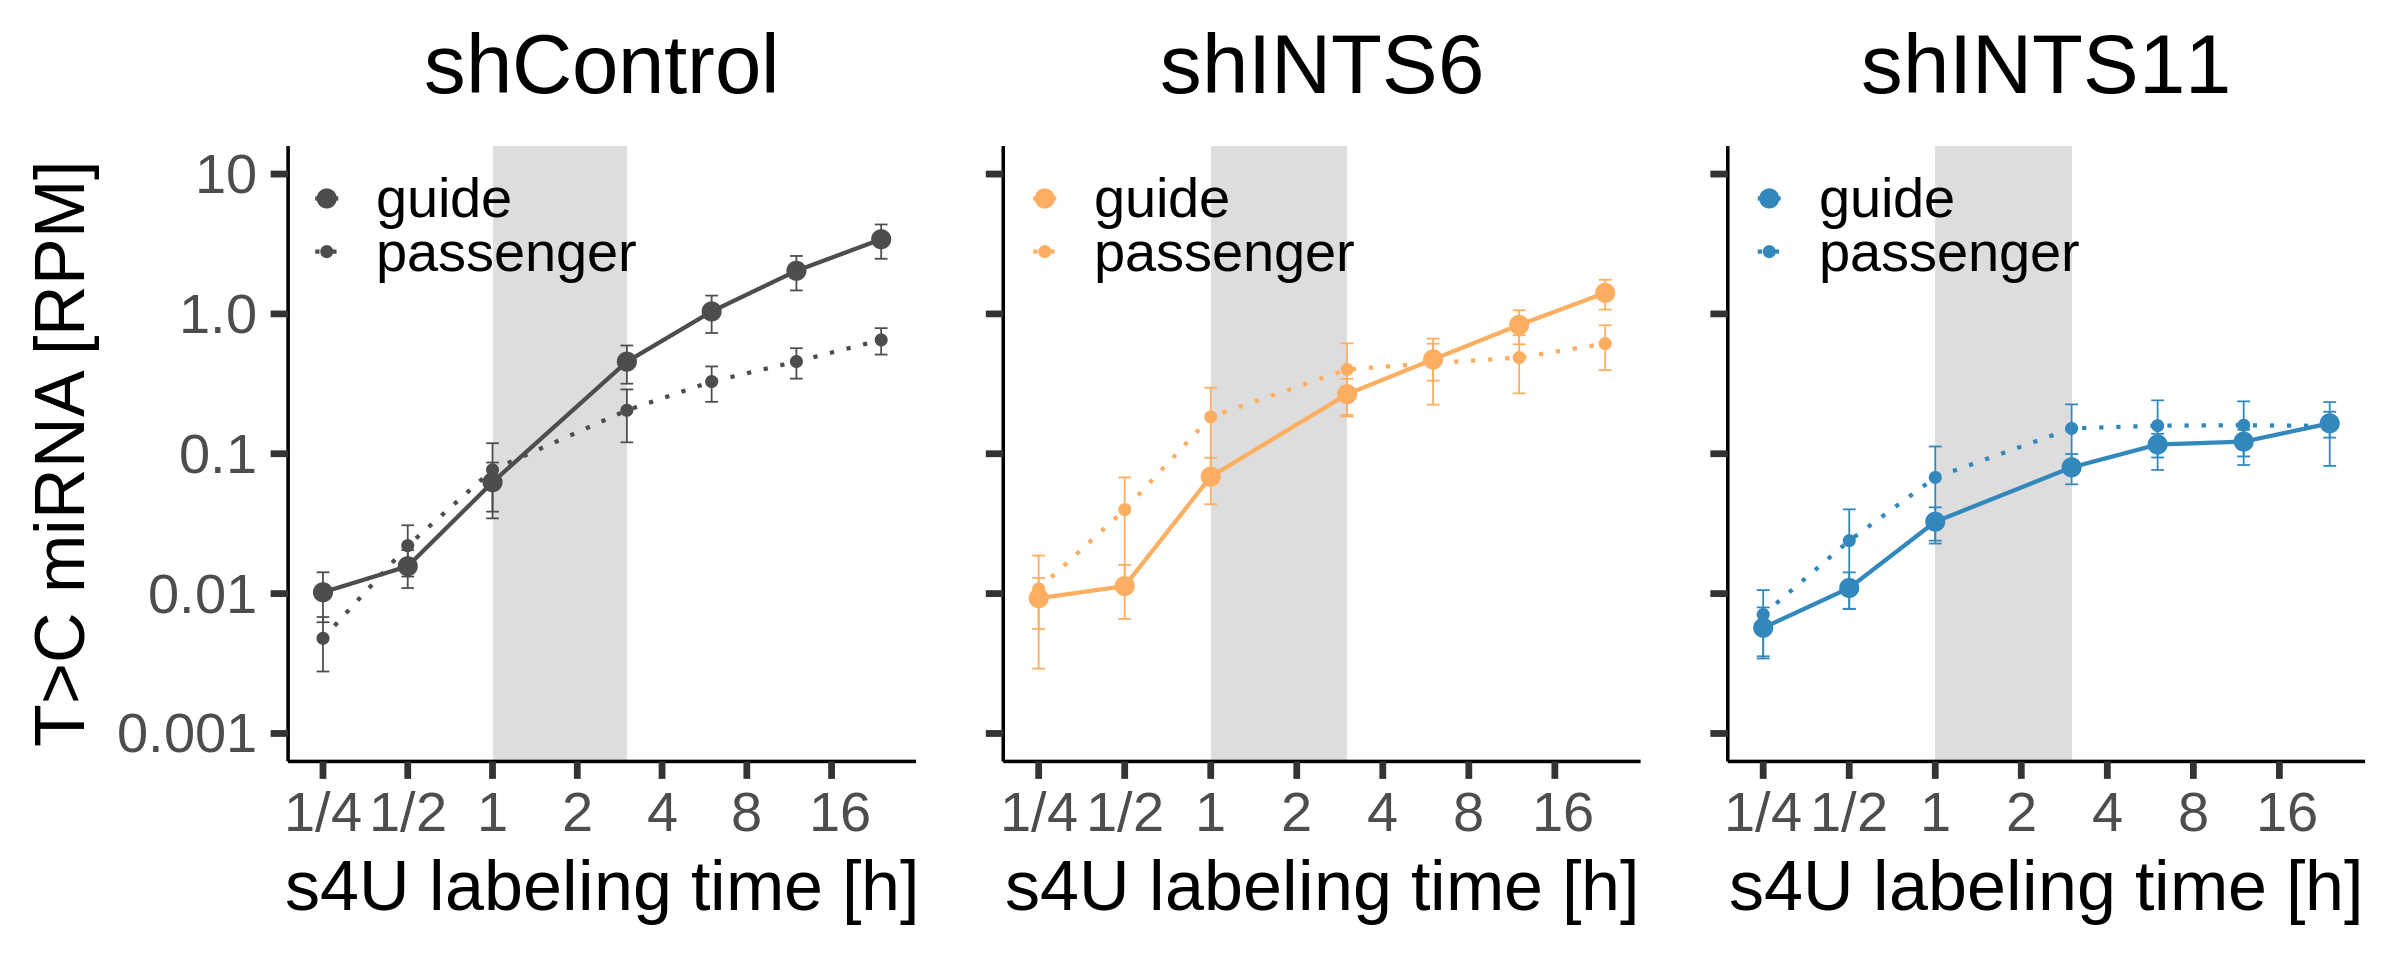

In [48]:
plot.gfp <- ggplot(data = test.gfp, aes(x = time, y=ppm)) +
        theme_bw(base_size = 42) +
        ggtitle("shControl") +
        theme(plot.title = element_text(hjust = '0.5', size=50)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text()) +
        theme(legend.position=c(0.3, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10', limits=c(0.001,10), breaks=c(0.001, 0.01, 0.1, 1, 10), labels=c("0.001","0.01","0.1", "1.0", "10"))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(aes(linetype=star), size=1.2, color=col_shgfp)+
        scale_linetype_manual(values=c("solid", "dotted"))+
        geom_point(aes(size=star), color=col_shgfp) +
        scale_size_manual(values=c(5,3))+
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se), color=col_shgfp)




plot.6 <- ggplot(data = test.ints6, aes(x = time, y=ppm)) +
        theme_bw(base_size = 42) +
        ggtitle("shINTS6") +
        theme(plot.title = element_text(hjust = '0.5', size=50)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text(), axis.title.y = element_blank(), axis.text.y = element_blank()) +
        theme(legend.position=c(0.3, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10', limits=c(0.001,10), breaks=c(0.001, 0.01, 0.1, 1, 10), labels=c("0.001","0.01","0.1", "1.0", "10"))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(aes(linetype=star), size=1.2, color=col_sh6)+
        scale_linetype_manual(values=c("solid", "dotted"))+
        geom_point(aes(size=star), color=col_sh6) +
        scale_size_manual(values=c(5,3))+
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se), color=col_sh6)


plot.11 <- ggplot(data = test.ints11, aes(x = time, y=ppm)) +
        theme_bw(base_size = 42) +
        ggtitle("shINTS11") +
        theme(plot.title = element_text(hjust = '0.5', size=50)) +
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              panel.background = element_blank(), panel.border = element_blank()) +
        theme(axis.line = element_line(colour = "black", size = 1), 
              axis.title.x = element_text(), axis.title.y = element_blank(), axis.text.y = element_blank()) +
        theme(legend.position=c(0.3, 0.9), legend.title = element_blank(), 
              legend.background = element_rect(fill="transparent")) +
        scale_x_continuous(trans = 'log2', breaks =c(1/16, 1/8, 1/4,1/2, 1, 2, 4, 8, 16), 
                           label=c("1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", " 16"))+
        scale_y_continuous(trans = 'log10', limits=c(0.001,10), breaks=c(0.001, 0.01, 0.1, 1, 10), labels=c("0.001","0.01","0.1", "1.0", "10"))+
        xlab("s4U labeling time [h]")+
        ylab("T>C miRNA [RPM]")+
        annotate("rect", xmin = 1, xmax = 3, ymin = 0, ymax = Inf, alpha = .2) +
        geom_line(aes(linetype=star), size=1.2, color=col_sh11)+
        scale_linetype_manual(values=c("solid", "dotted"))+
        geom_point(aes(size=star), color=col_sh11) +
        scale_size_manual(values=c(5,3))+
        geom_errorbar(width=.15, aes(ymin=ppm-se, ymax=ppm+se), color=col_sh11)

options(repr.plot.width=20, repr.plot.height=8)
plot_grid(plot.gfp, plot.6, plot.11, ncol=3, rel_widths = c(1.05,0.8, 0.8))